### HW3.7.ab_code

In [10]:
## fit a gaussian distribution
# Load data
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import random

mnist = io.loadmat("mnist-data/%s_data.mat" % "mnist")
print("\nloaded %s data!" % mnist)
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, mnist[field].shape)

mTraining = mnist['training_data']
mLabel = mnist['training_labels']
mTest = mnist['test_data']


loaded {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 13 17:30:33 2019', '__version__': '1.0', '__globals__': [], 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'training_labels': array([[8],
       [2],
       [7],
       ...,
       [3],
       [6],
       [0]], dtype=uint8), 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)} data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)


In [12]:
# Contrast-normalize the images
def normalize(X):
    X_n = np.zeros(X.shape)
    for i in range(X.shape[0]):
        x = X[i, :]
        X_n[i, :] = (x/(np.sqrt(x.dot(x))+1e-20))
    return X_n
X_train = normalize(mTraining)

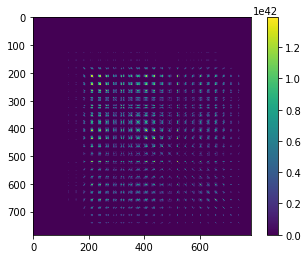

In [13]:
# Computing a mean and a covariance matrix for each digit class
new = pd.DataFrame(mLabel)
for digit in range(0, len(new[0].unique())):
    X_train_d = X_train[new[0]==digit, :]
    mean = X_train_d.mean(axis=0)
    cov = np.cov(X_train_d.T)

# Visualize the covariance matrix for a particular class (digit)
plt.imshow(cov)
plt.colorbar()
plt.show()
